In [44]:
from kats.consts import TimeSeriesData
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
from src.bgc_providers.ohio_bgc_provider import OhioBgcProvider

In [11]:
provider = OhioBgcProvider()

In [15]:
data = provider.get_glycose_levels()
data_array = []
for glucose_event in data:
    array_value = float(glucose_event.attrib['value'])
    data_array.append([glucose_event.attrib['ts'], array_value ])
df = pd.DataFrame(data=data_array, columns=['time', 'bg_value'])
df

,time,bg_value
0,07-12-2021 01:17:00,101.0
1,07-12-2021 01:22:00,98.0
2,07-12-2021 01:27:00,104.0
3,07-12-2021 01:32:00,112.0
4,07-12-2021 01:37:00,120.0
...,...,...
10791,17-01-2022 23:36:00,161.0
10792,17-01-2022 23:41:00,164.0
10793,17-01-2022 23:46:00,168.0
10794,17-01-2022 23:51:00,172.0


In [17]:
ts = TimeSeriesData(df)

In [18]:
ts

,time,bg_value
0,2021-07-12 01:17:00,101.0
1,2021-07-12 01:22:00,98.0
2,2021-07-12 01:27:00,104.0
3,2021-07-12 01:32:00,112.0
4,2021-07-12 01:37:00,120.0
...,...,...
10791,2022-12-01 23:35:00,114.0
10792,2022-12-01 23:40:00,115.0
10793,2022-12-01 23:45:00,117.0
10794,2022-12-01 23:50:00,119.0


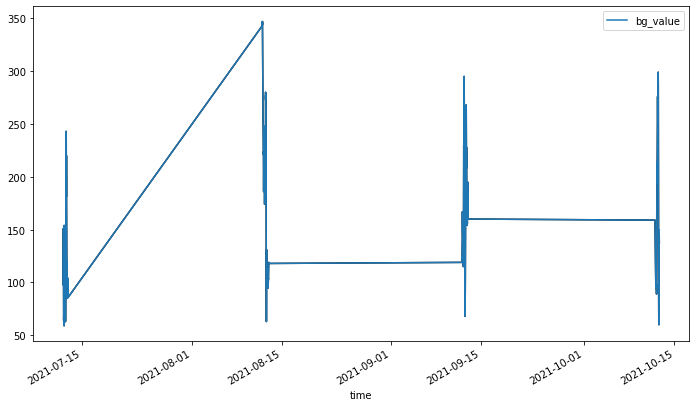

In [22]:
ts[1:1000].plot(cols=['bg_value'])

In [36]:
# import the param and model classes for Prophet model
from kats.models.prophet import ProphetModel, ProphetParams

# create a model param instance
params = ProphetParams(seasonality_mode='additive') # additive mode gives worse results

# create a prophet model instance
m = ProphetModel(ts[0:200], params)

# fit model simply by calling m.fit()
m.fit()

# make prediction for next 30 month
fcst = m.predict(steps=30, freq='5Min')
fcst.head()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,time,fcst,fcst_lower,fcst_upper
0,2021-07-12 17:57:00,130.127289,73.697369,185.487983
1,2021-07-12 18:02:00,130.205809,72.566893,188.430772
2,2021-07-12 18:07:00,130.284329,74.328341,190.919253
3,2021-07-12 18:12:00,130.362848,69.861533,193.447246
4,2021-07-12 18:17:00,130.441368,70.918647,191.586405


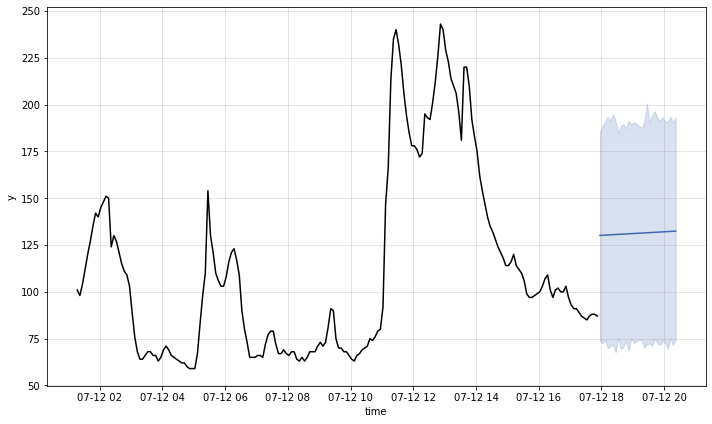

In [37]:
m.plot()

In [39]:
from auto_ts import auto_timeseries

Imported auto_timeseries version:0.0.36. Call by using:
model = auto_timeseries(score_type='rmse',
                time_interval='M',
                non_seasonal_pdq=None, seasonality=False, seasonal_period=12,
                model_type=['best'],
                verbose=2)
model.fit(traindata, ts_column,target)
model.predict(testdata, model='best')



In [41]:
train_df = df.iloc[:10000]
test_df = df.iloc[10000:]

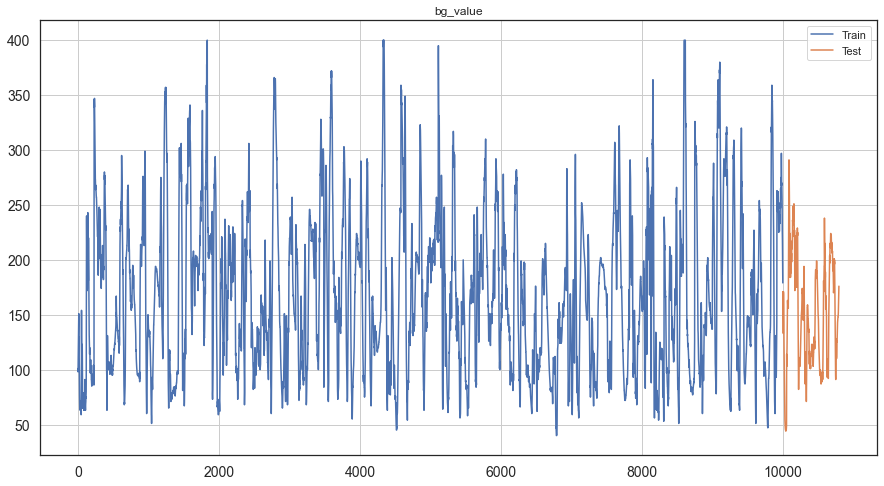

In [45]:
train_df.bg_value.plot(figsize=(15,8), title= 'bg_value', fontsize=14, label='Train')
test_df.bg_value.plot(figsize=(15,8), title= 'bg_value', fontsize=14, label='Test')
plt.legend()
plt.grid()
plt.show()

In [52]:
model = auto_timeseries(forecast_period=6, score_type='rmse', time_interval='5T', model_type='best')
model.fit(traindata= train_df, ts_column="time", target="bg_value")

Start of Fit.....
    Target variable given as = bg_value
Start of loading of data.....
Input is data frame. Performing Time Series Analysis
ts_column: time sep: , target: bg_value
    Loaded pandas dataframe...
    pandas Dataframe loaded successfully. Shape of data set = (10000, 1)
No time series plot since verbose = 0. Continuing
Time Interval is given as 5T
    Error: You must give a valid time interval frequency from Pandas date-range frequency codes


In [54]:
import sktime


In [62]:
df2 = df.set_index(pd.to_datetime(df['time']))

In [63]:
type(df2['bg_value'])

pandas.core.series.Series

In [64]:
from sktime.utils.plotting import plot_series

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='bg_value'>)

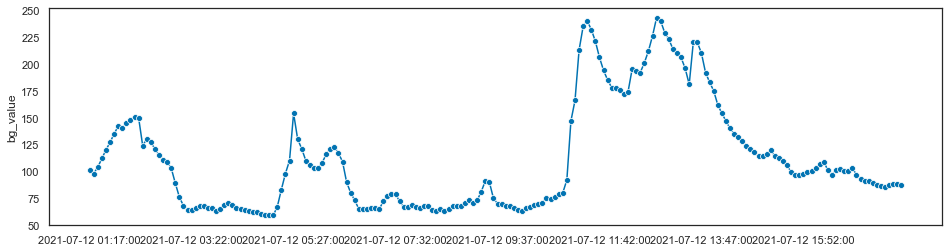

In [69]:
plot_series(df2['bg_value'][:200])

In [66]:
df2

,time,bg_value
time,,
2021-07-12 01:17:00,07-12-2021 01:17:00,101.0
2021-07-12 01:22:00,07-12-2021 01:22:00,98.0
2021-07-12 01:27:00,07-12-2021 01:27:00,104.0
2021-07-12 01:32:00,07-12-2021 01:32:00,112.0
2021-07-12 01:37:00,07-12-2021 01:37:00,120.0
...,...,...
2022-01-17 23:36:00,17-01-2022 23:36:00,161.0
2022-01-17 23:41:00,17-01-2022 23:41:00,164.0
2022-01-17 23:46:00,17-01-2022 23:46:00,168.0


<AxesSubplot:xlabel='time'>

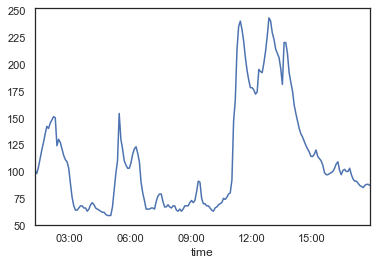

In [68]:
df2['bg_value'][:200].plot()

In [70]:
import numpy as np

In [166]:
fh = np.arange(1, 30)
fh

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [172]:
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.trend import PolynomialTrendForecaster
from sktime.forecasting.arima import AutoARIMA
forecaster = AutoARIMA()

In [173]:
y = df2['bg_value'][300:600]
y.index = y.index.to_period('5T')
y.index


PeriodIndex(['2021-08-12 06:04', '2021-08-12 06:09', '2021-08-12 06:14',
             '2021-08-12 06:19', '2021-08-12 06:24', '2021-08-12 06:29',
             '2021-08-12 06:34', '2021-08-12 06:39', '2021-08-12 06:44',
             '2021-08-12 06:49',
             ...
             '2021-09-12 06:14', '2021-09-12 06:19', '2021-09-12 06:24',
             '2021-09-12 06:29', '2021-09-12 06:34', '2021-09-12 06:39',
             '2021-09-12 06:44', '2021-09-12 06:49', '2021-09-12 06:54',
             '2021-09-12 06:59'],
            dtype='period[5T]', name='time', length=300, freq='5T')

In [174]:
# from sktime.forecasting.base import ForecastingHorizon
# fh = ForecastingHorizon()
# # cutoff = pd.Period("2021-07-12 17:52:00", freq="5T")
# # fh.to_relative(cutoff)
# # fh.to_absolute(cutoff)


# fh

In [175]:
forecaster.fit(y, fh=fh)

AutoARIMA()

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='bg_value'>)

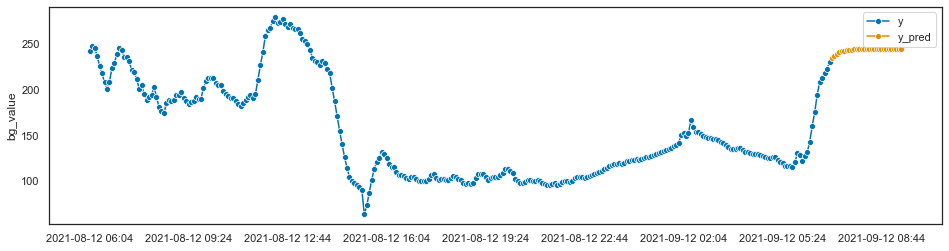

In [176]:
y_pred = forecaster.predict()
plot_series(y, y_pred, labels=["y", "y_pred"])

In [139]:
type(y.index)

pandas.core.indexes.period.PeriodIndex

In [157]:
y

time
2021-08-12 06:04    242.0
2021-08-12 06:09    248.0
2021-08-12 06:14    246.0
2021-08-12 06:19    237.0
2021-08-12 06:24    226.0
                    ...  
2021-09-12 06:39    208.0
2021-09-12 06:44    213.0
2021-09-12 06:49    218.0
2021-09-12 06:54    223.0
2021-09-12 06:59    230.0
Freq: 5T, Name: bg_value, Length: 300, dtype: float64